In [9]:
import pandas as pd

file_path = "../data/MachineLearningRating_v3.txt"

# Load the file using the pipe delimiter
df = pd.read_csv(file_path, delimiter="|")

# Display the first few rows to confirm it loaded correctly
print(df.head())

# Optionally, check the DataFrame's info to see column names and data types
print(df.info())

C:\Users\selam\AppData\Local\Temp\ipykernel_2912\3067578763.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter="|")


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [1]:
import sys
import os

# Assuming this is in your notebook before the import from eda_bivariate_multivariate
current_working_directory = os.getcwd()
scripts_directory_path = os.path.abspath(os.path.join(current_working_directory, '../scripts'))

if scripts_directory_path not in sys.path:
    sys.path.append(scripts_directory_path)
    print(f"Added '{scripts_directory_path}' to sys.path.")
else:
    print(f"'{scripts_directory_path}' already in sys.path.")

print("\n--- Current sys.path ---")
for p in sys.path:
    print(p)
print("--------------------------\n")

Added 'S:\AI MAstery\week-3\acis-week3-analytics\scripts' to sys.path.

--- Current sys.path ---
C:\Users\selam\AppData\Local\Programs\Python\Python312\python312.zip
C:\Users\selam\AppData\Local\Programs\Python\Python312\DLLs
C:\Users\selam\AppData\Local\Programs\Python\Python312\Lib
C:\Users\selam\AppData\Local\Programs\Python\Python312
S:\AI MAstery\week-3\acis-week3-analytics\venv

S:\AI MAstery\week-3\acis-week3-analytics\venv\Lib\site-packages
S:\AI MAstery\week-3\acis-week3-analytics\venv\Lib\site-packages\win32
S:\AI MAstery\week-3\acis-week3-analytics\venv\Lib\site-packages\win32\lib
S:\AI MAstery\week-3\acis-week3-analytics\venv\Lib\site-packages\Pythonwin
S:\AI MAstery\week-3\acis-week3-analytics\scripts
--------------------------



In [2]:
import pandas as pd

# Define the file path
file_path = "../data/MachineLearningRating_v3.txt"

# Load the file using the pipe delimiter
# We'll explicitly handle dtypes for CapitalOutstanding and CrossBorder later
# Setting low_memory=False can sometimes help pandas infer types better for large files,
# but it uses more memory. We'll leave it out for now as we're fixing dtypes explicitly.
df = pd.read_csv(file_path, delimiter="|")

# --- Addressing the DtypeWarning ---

# Column 32: 'CapitalOutstanding'
# This column likely contains numeric values but might have some non-numeric entries
# (e.g., empty strings, dashes, or specific text like "N/A").
# We'll convert it to a numeric type, coercing any errors to NaN (Not a Number).
# This means any value that can't be converted to a number will become NaN.
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')

# Column 37: 'CrossBorder'
# This column has very few non-null values and might also contain mixed types.
# You'll need to decide what this column represents.
# If it's meant to be a boolean (True/False or 1/0), we can try to convert it.
# For demonstration, let's treat it as a string column for now, as it has so few entries.
# If you confirm it should be numeric or boolean, you can apply similar conversion logic.
# For example, if it's meant to be True/False, you might do:
# df['CrossBorder'] = df['CrossBorder'].map({'Yes': True, 'No': False, '1': True, '0': False}).astype(bool)
# Since the warning indicates mixed types, and it has very few non-nulls,
# keeping it as an 'object' (string) type is often the safest initial approach,
# or converting it to a specific category if its unique values are known.
# Let's clean it by converting known "False" representations to False, and others to NaN if non-boolean
df['CrossBorder'] = df['CrossBorder'].replace({'False': False, 'false': False, '0': False, '': pd.NA})
df['CrossBorder'] = pd.to_numeric(df['CrossBorder'], errors='coerce').astype('boolean') # Convert to nullable boolean

# --- Converting Date Columns ---

# 'TransactionMonth' and 'VehicleIntroDate' are currently 'object' (string) type.
# Convert them to datetime objects for proper date-based analysis.
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])

# --- Initial Data Inspection ---

print("--- First 5 rows of the DataFrame (df.head()) ---")
print(df.head())
print("\n" + "="*50 + "\n") # Separator

print("--- DataFrame Information (df.info()) ---")
# This will show column names, non-null counts, and updated data types
df.info()
print("\n" + "="*50 + "\n") # Separator

print("--- Descriptive Statistics (df.describe()) ---")
# This provides statistical summary for numeric columns
print(df.describe())
print("\n" + "="*50 + "\n") # Separator

print("--- Missing Values Count (df.isnull().sum()) ---")
# Check how many missing values are in each column
print(df.isnull().sum())
print("\n" + "="*50 + "\n") # Separator

print("--- Unique Values for Key Categorical Columns ---")
# This is useful for understanding the categories in your 'object' columns.
# Adjust these columns based on your specific needs.
for col in ['LegalType', 'Title', 'Gender', 'ItemType', 'Product', 'StatutoryClass']:
    if col in df.columns:
        print(f"\nUnique values for '{col}':")
        print(df[col].unique())

C:\Users\selam\AppData\Local\Temp\ipykernel_15256\848505268.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter="|")
C:\Users\selam\AppData\Local\Temp\ipykernel_15256\848505268.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


--- First 5 rows of the DataFrame (df.head()) ---
   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  .

In [3]:
import sys
import os

# Get the absolute path to the directory containing the script
# Assuming 'eda_descriptive_stats.py' is inside a 'scripts' folder
# and your current script is in a parent directory relative to 'scripts'.
scripts_dir = os.path.abspath('../scripts')

# Add the 'scripts' directory to sys.path
sys.path.append(scripts_dir)

# Now you can import the module correctly
from eda_descriptive_stats import load_data, describe_variables, plot_distribution

# Load the data
df = load_data('../data/MachineLearningRating_v3.txt')

# Describe financial variables
describe_variables(df, ['TotalPremium', 'TotalClaims'])

# Example of how you might use plot_distribution if needed
# plot_distribution(df, 'TotalPremium')


Attempting to load data from: ../data/MachineLearningRating_v3.txt


S:\AI MAstery\week-3\acis-week3-analytics\scripts\eda_descriptive_stats.py:15: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter="|")
S:\AI MAstery\week-3\acis-week3-analytics\scripts\eda_descriptive_stats.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


Data loaded and preprocessed successfully!

--- Descriptive Statistics for TotalPremium, TotalClaims ---
        TotalPremium   TotalClaims
count   1.000098e+06  1.000098e+06
min    -7.825768e+02 -1.200241e+04
max     6.528260e+04  3.930921e+05
mean    6.190550e+01  6.486119e+01
median  2.178333e+00  0.000000e+00
std     2.302845e+02  2.384075e+03
skew    1.385965e+02  6.993312e+01
kurt    3.717619e+04  6.791926e+03




,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
min,-7.825768e+02,-1.200241e+04
max,6.528260e+04,3.930921e+05
mean,6.190550e+01,6.486119e+01
median,2.178333e+00,0.000000e+00
std,2.302845e+02,2.384075e+03
skew,1.385965e+02,6.993312e+01
kurt,3.717619e+04,6.791926e+03


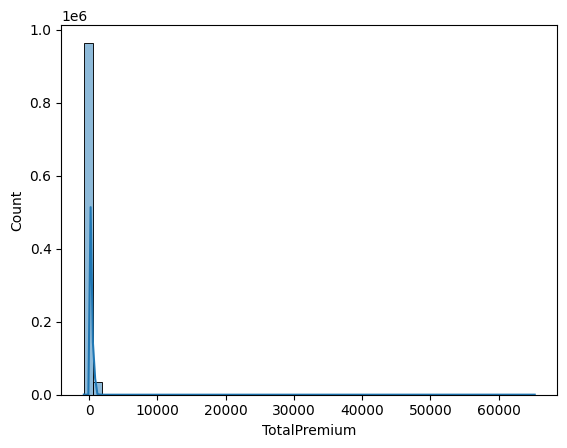

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['TotalPremium'].dropna(), bins=50, kde=True)
plt.show()


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_distribution(df, column, save_path=None):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    
    plt.close()



In [35]:
from eda_summary import summarize_numerical_features, review_data_structure

# Run summary
summarize_numerical_features(df, ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured'])

# Review structure
review_data_structure(df)


📊 Descriptive Statistics for Numerical Features:
                         count           mean           std           min  \
TotalPremium         1000098.0      61.905496  2.302845e+02   -782.576754   
TotalClaims          1000098.0      64.861190  2.384075e+03 -12002.412281   
CustomValueEstimate   220456.0  225531.129942  5.645157e+05  20000.000000   
SumInsured           1000098.0  604172.732589  1.508332e+06      0.010000   

                          25%            50%            75%           max  
TotalPremium              0.0       2.178333      21.929825  6.528260e+04  
TotalClaims               0.0       0.000000       0.000000  3.930921e+05  
CustomValueEstimate  135000.0  220000.000000  280000.000000  2.655000e+07  
SumInsured             5000.0    7500.000000  250000.000000  1.263620e+07  

🔍 Variability (Standard Deviation):
SumInsured             1.508332e+06
CustomValueEstimate    5.645157e+05
TotalClaims            2.384075e+03
TotalPremium           2.302845e+02
dtyp

🔍 Missing Values Summary:
                         MissingValues     Percent
CrossBorder                    1000098  100.000000
NumberOfVehiclesInFleet        1000098  100.000000
CustomValueEstimate             779642   77.956560
WrittenOff                      641901   64.183810
Converted                       641901   64.183810
Rebuilt                         641901   64.183810
NewVehicle                      153295   15.327998
Bank                            145961   14.594670
AccountType                      40232    4.022806
Gender                            9536    0.953507
MaritalStatus                     8259    0.825819
mmcode                             552    0.055195
VehicleType                        552    0.055195
make                               552    0.055195
VehicleIntroDate                   552    0.055195
NumberOfDoors                      552    0.055195
bodytype                           552    0.055195
kilowatts                          552    0.055195
cubic

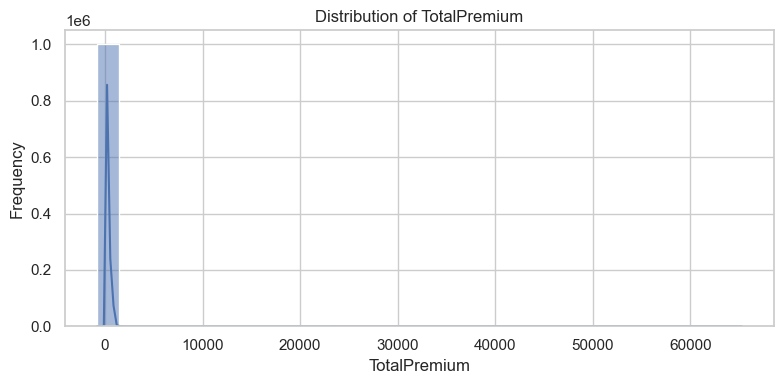

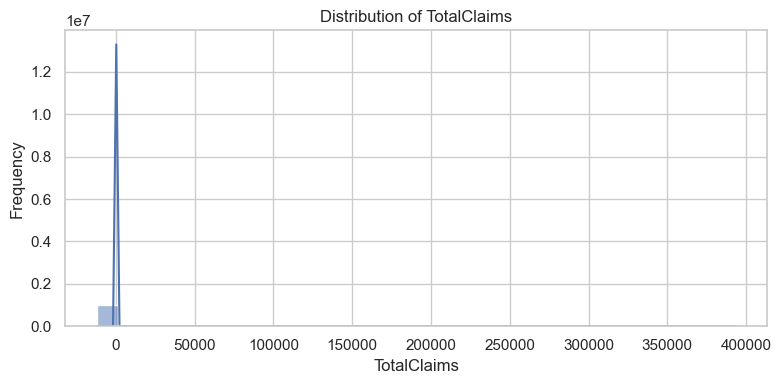

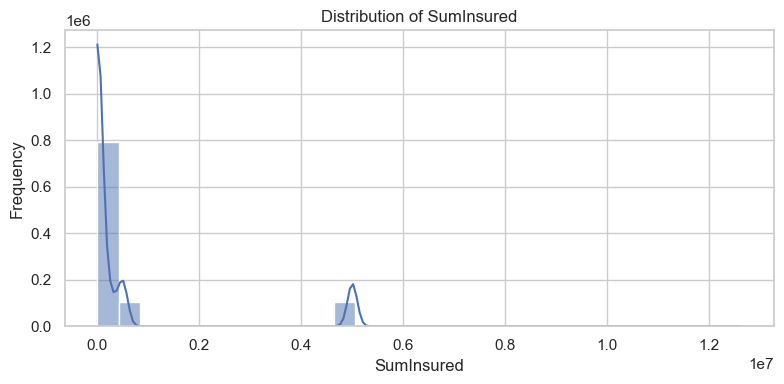

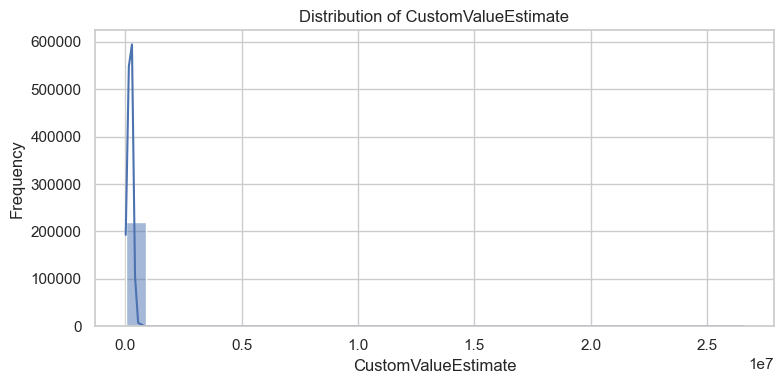

📊 Bar Charts for Categorical Features:


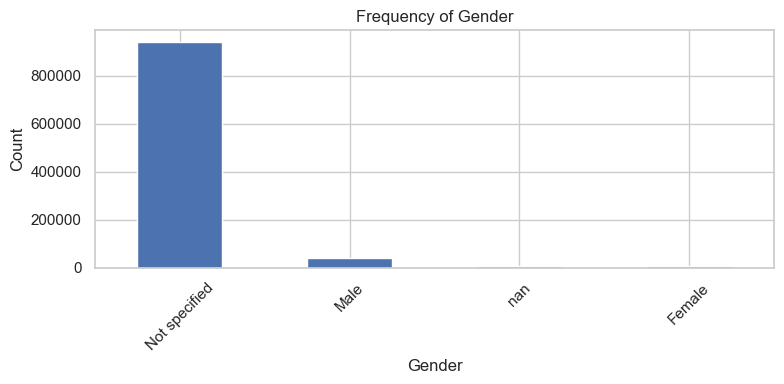

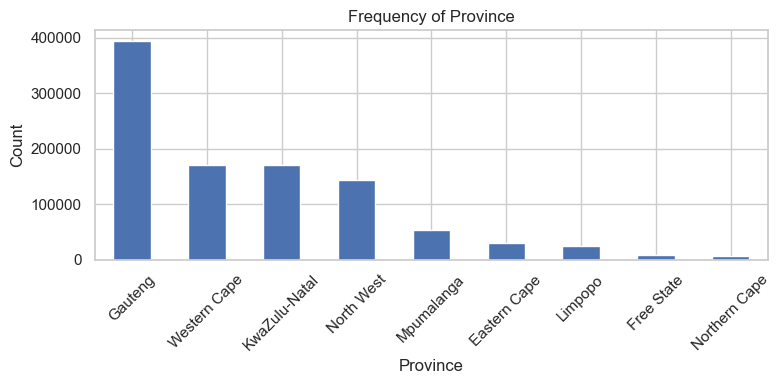

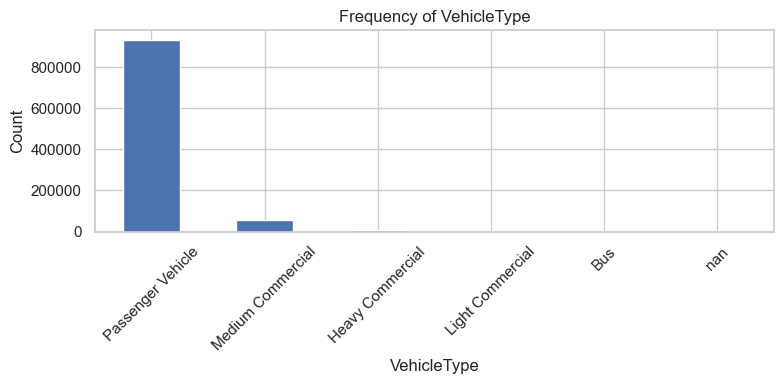

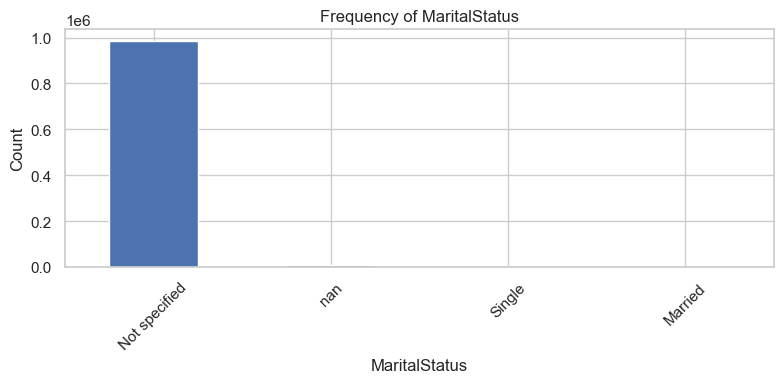

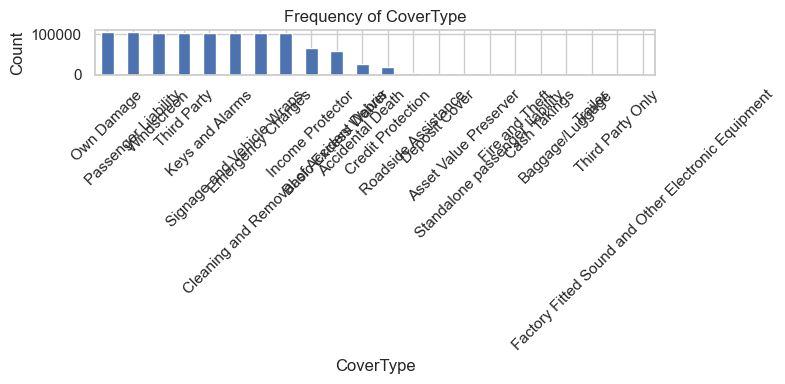

In [5]:
from eda_quality_univariate import check_missing_values, plot_numerical_distributions, plot_categorical_distributions

# 🔎 3. Data Quality Check
check_missing_values(df)

# 📈 4. Univariate Analysis
num_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
plot_numerical_distributions(df, num_cols)

cat_cols = ['Gender', 'Province', 'VehicleType', 'MaritalStatus', 'CoverType']
plot_categorical_distributions(df, cat_cols)


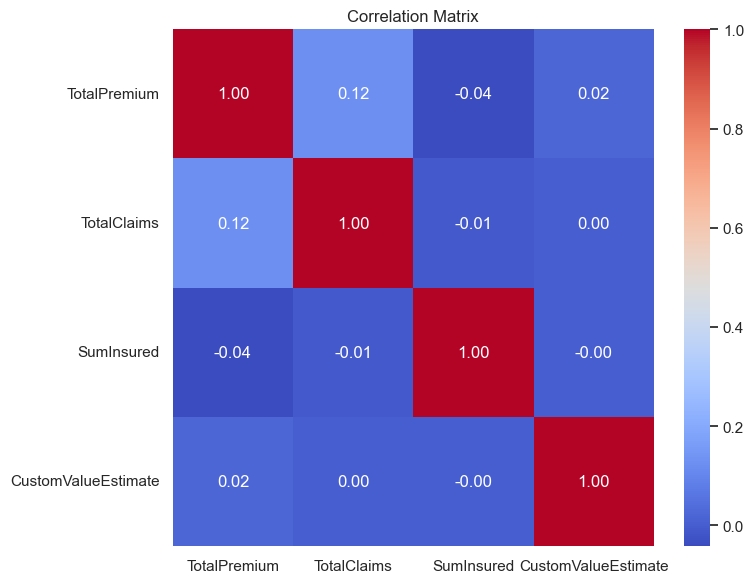

TypeError: scatter_plot_monthly() got an unexpected keyword argument 'max_groups'

In [17]:
from eda_bivariate_multivariate import (
    correlation_matrix,
    scatter_plot_monthly,
   # compare_by_category,
    #outlier_boxplot
)

# Only this one shows now
correlation_matrix(df, ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate'])

# Then run this next one manually
scatter_plot_monthly(df, group_by='Province', max_groups=3)

# Geographic boxplot for one feature
#compare_by_category(df, category='Province', feature='TotalPremium')

# Then outlier check
#outlier_boxplot(df, 'TotalClaims')



In [16]:
import eda_bivariate_multivariate
print(eda_bivariate_multivariate.__file__)

S:\AI MAstery\week-3\acis-week3-analytics\scripts\eda_bivariate_multivariate.py


In [25]:
%load_ext autoreload
%autoreload 2


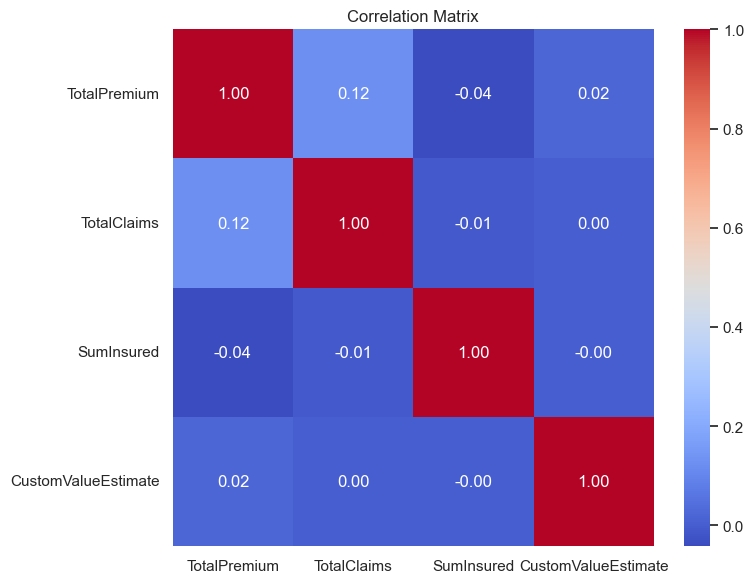

In [29]:
from eda_bivariate_multivariate import (
    correlation_matrix   
)
# Works ✅
correlation_matrix(df, ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate'])




--- Generating Monthly Premium vs Claims Scatter Plots for top 3 PostalCodes ---


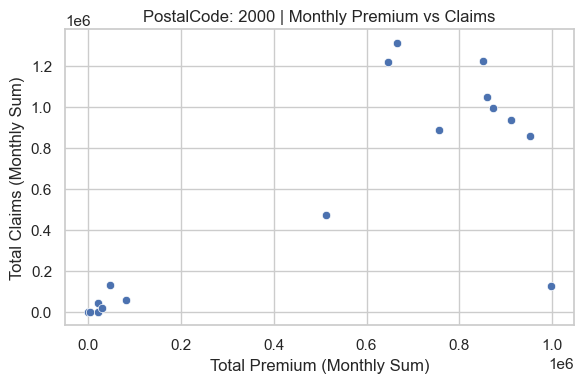

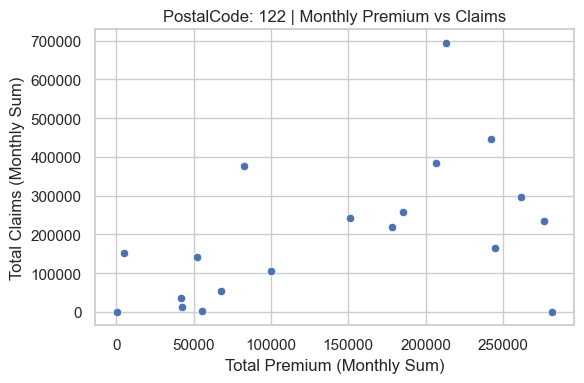

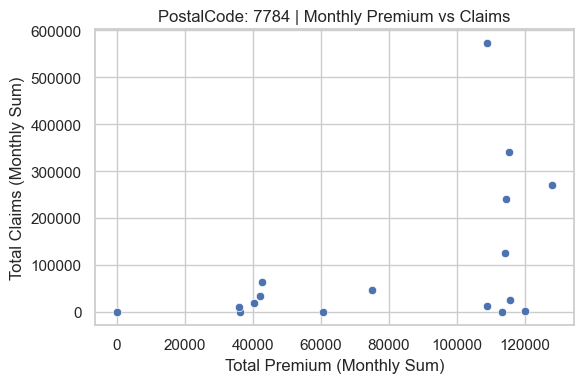

âœ… Monthly scatter plots generated and displayed.


In [42]:
from eda_bivariate_multivariate import (
    scatter_plot_monthly
)

# Scatter plot by PostalCode (or any other group)
scatter_plot_monthly(df, date_col='TransactionMonth', group_col='PostalCode', max_groups=3)

In [45]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


📊 Univariate Analysis:


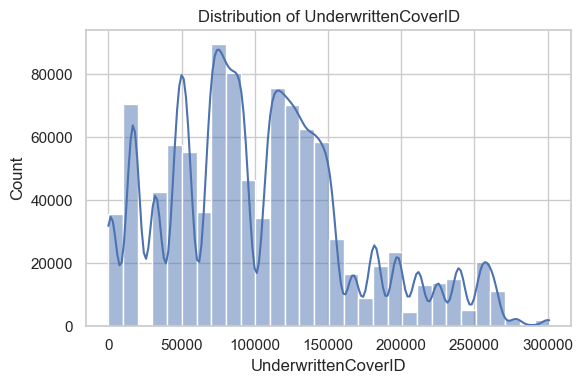

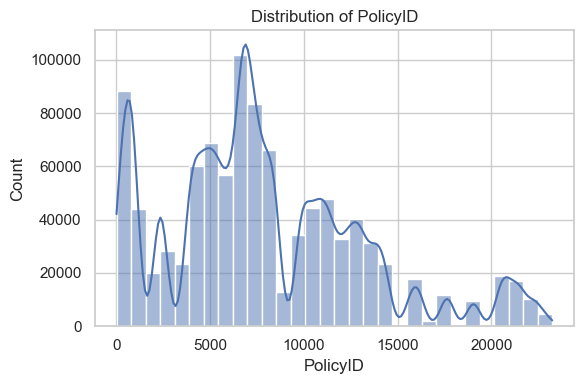

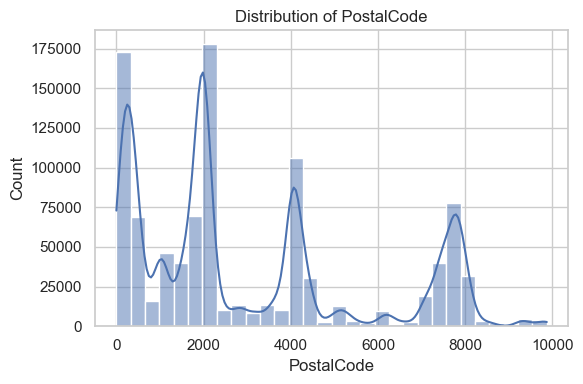

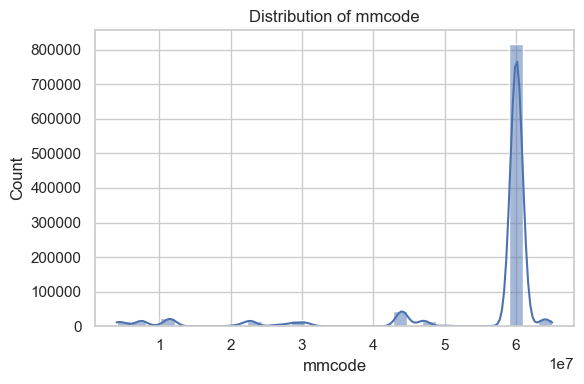

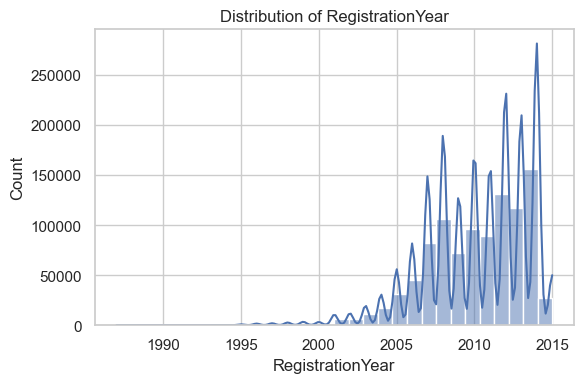

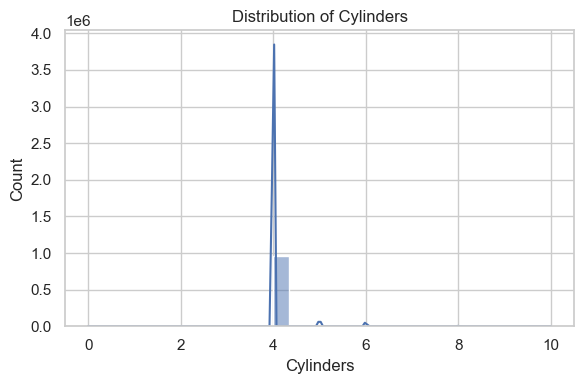

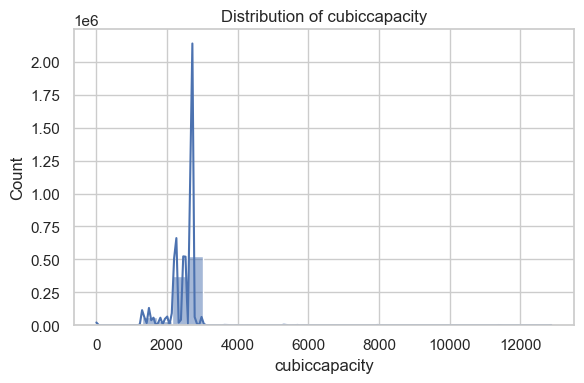

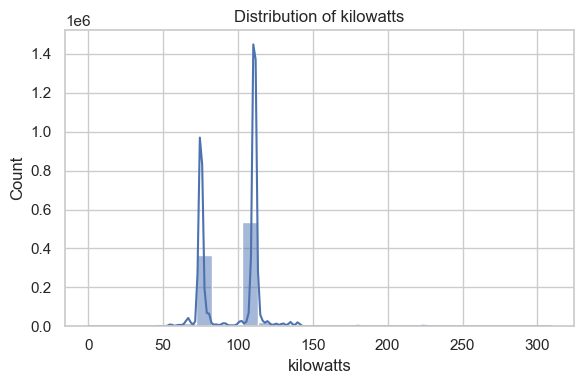

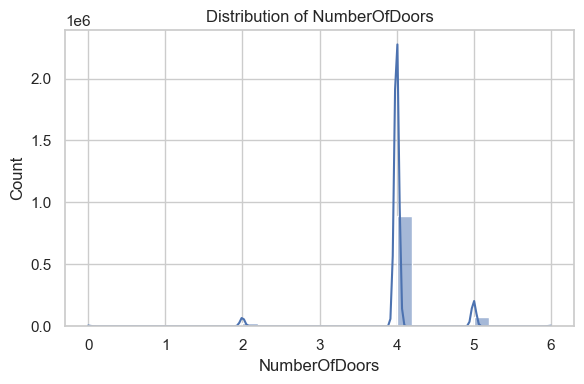

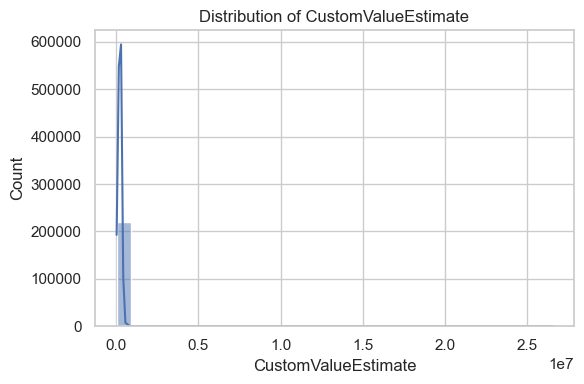

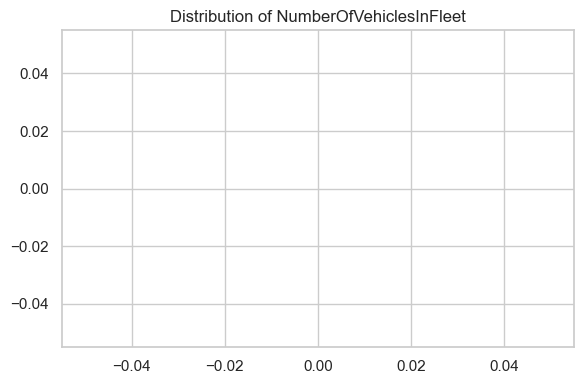

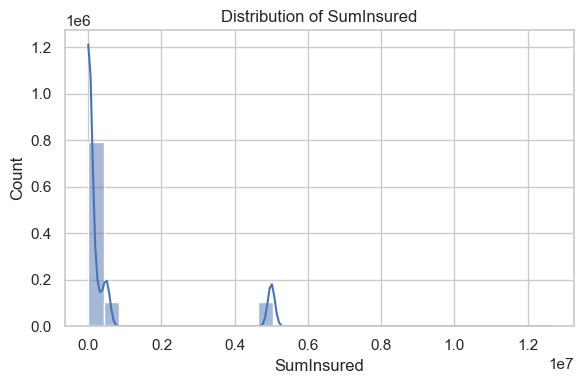

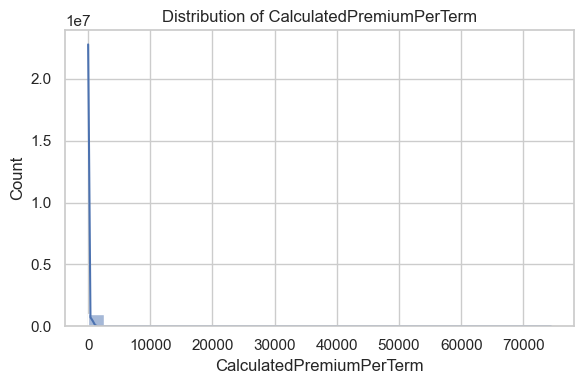

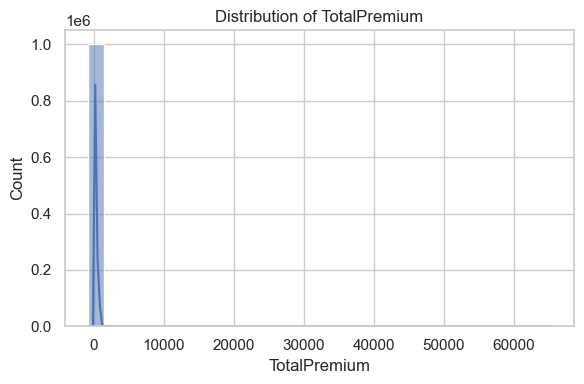

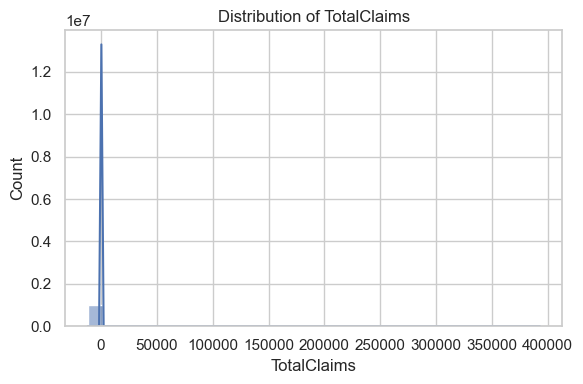

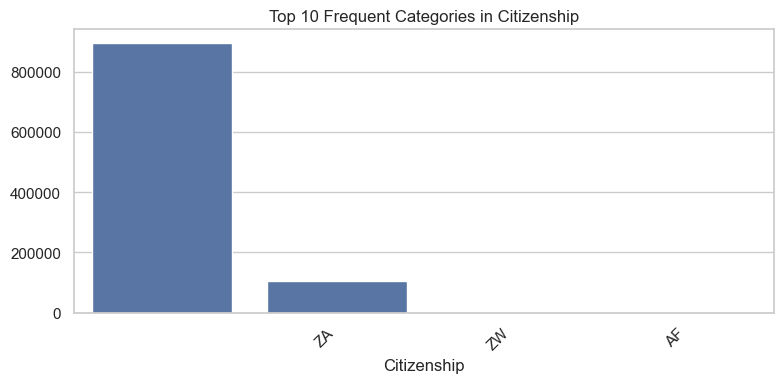

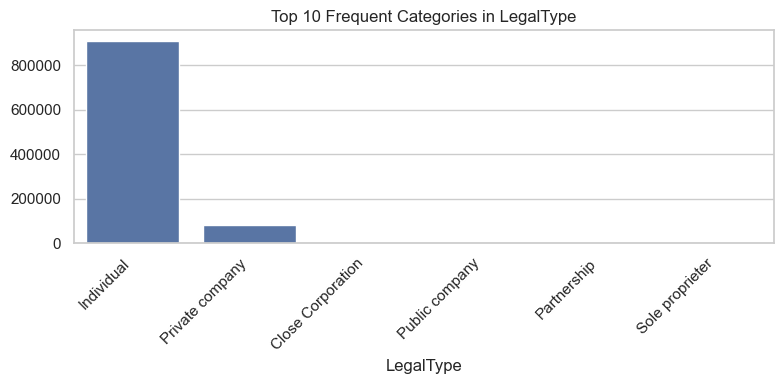

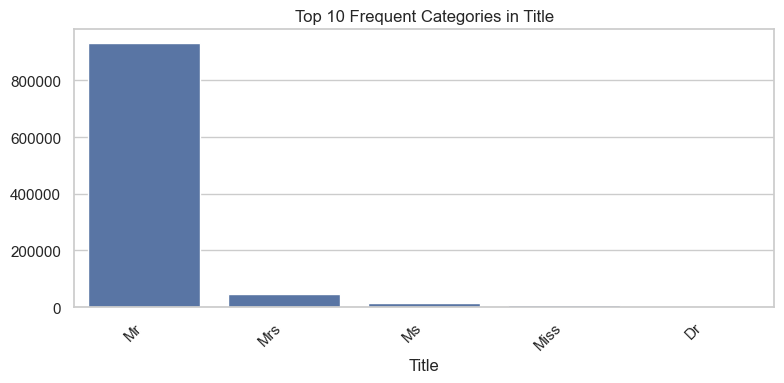

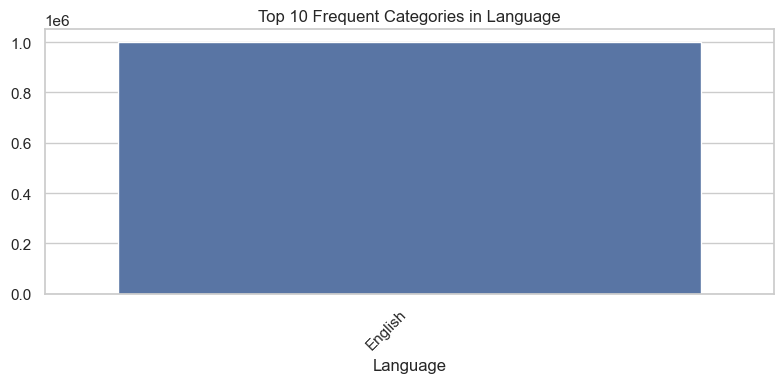

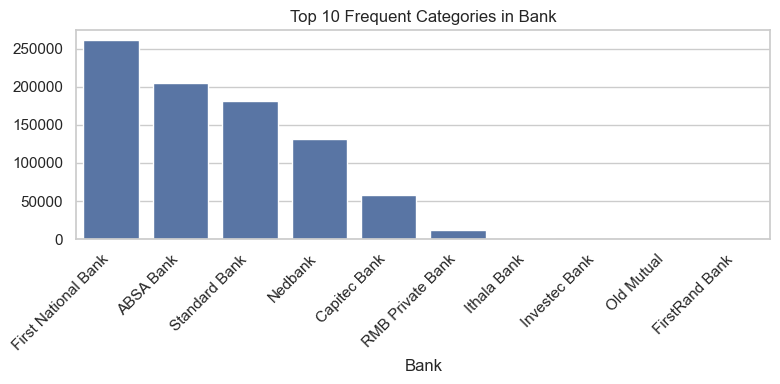

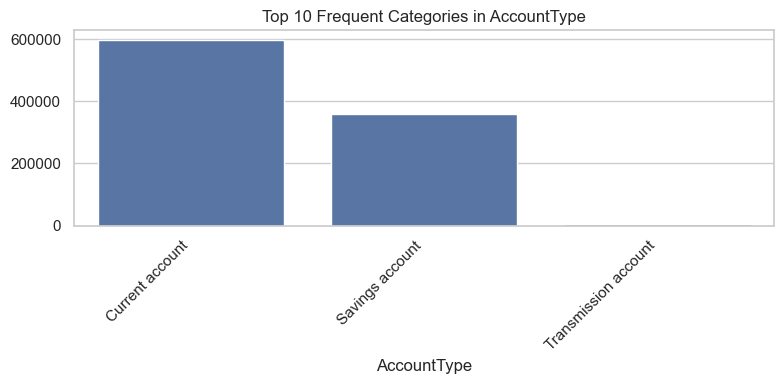

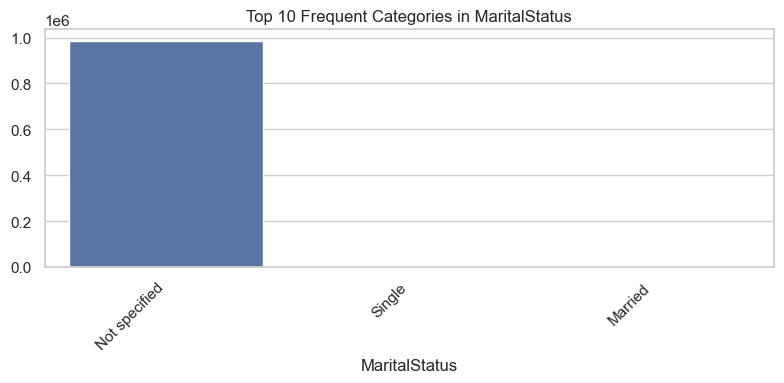

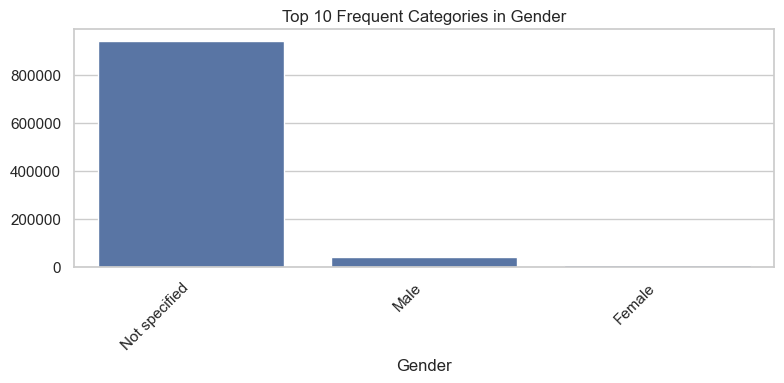

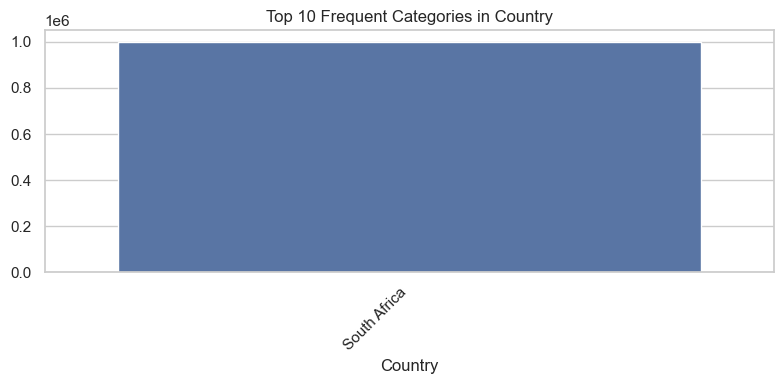

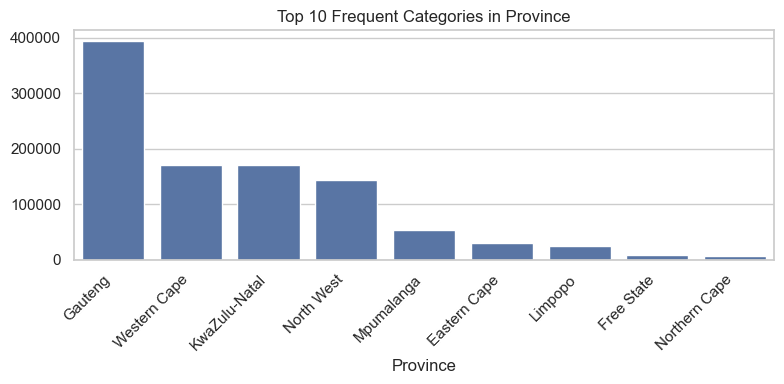

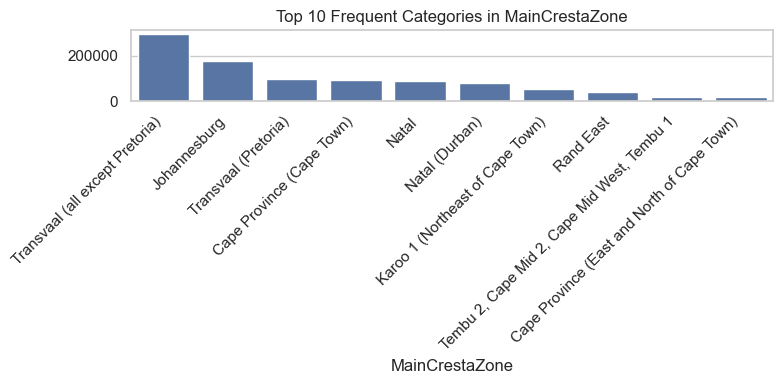

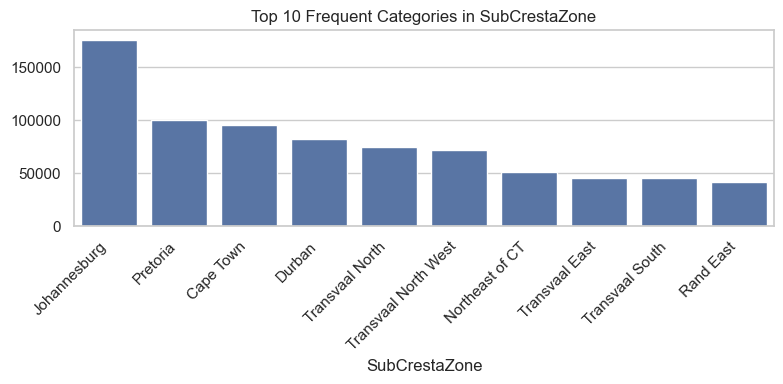

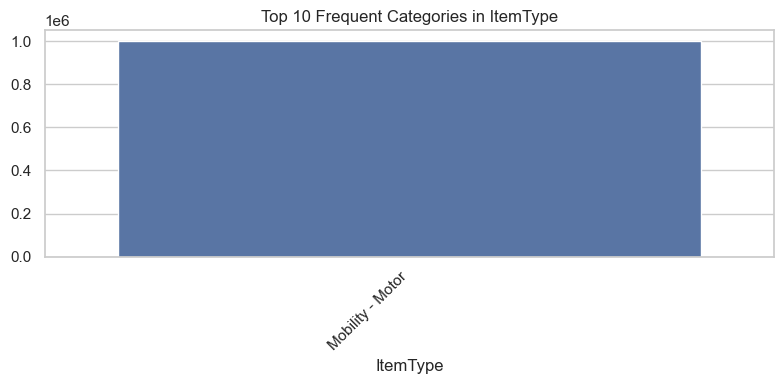

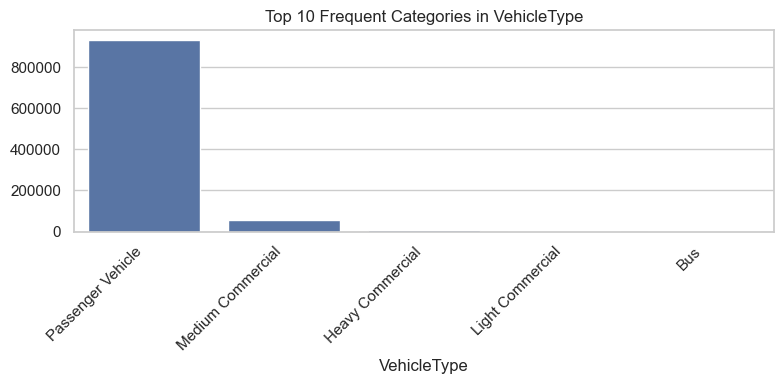

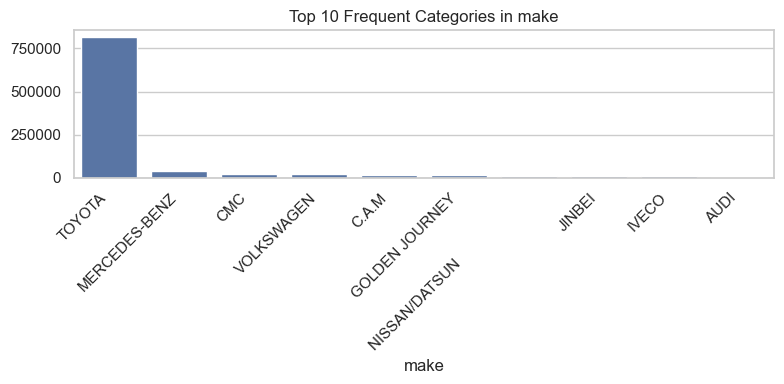

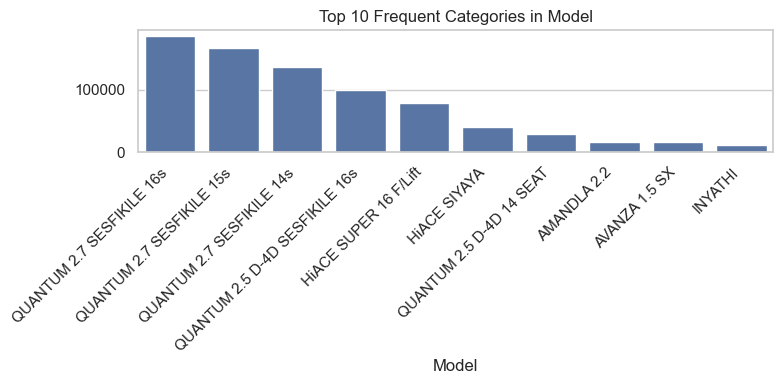

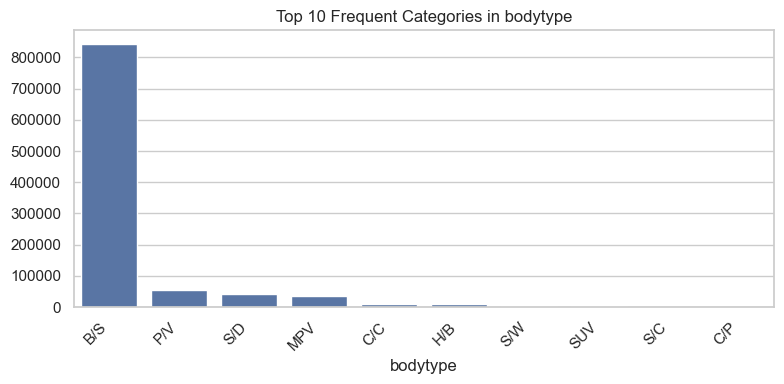

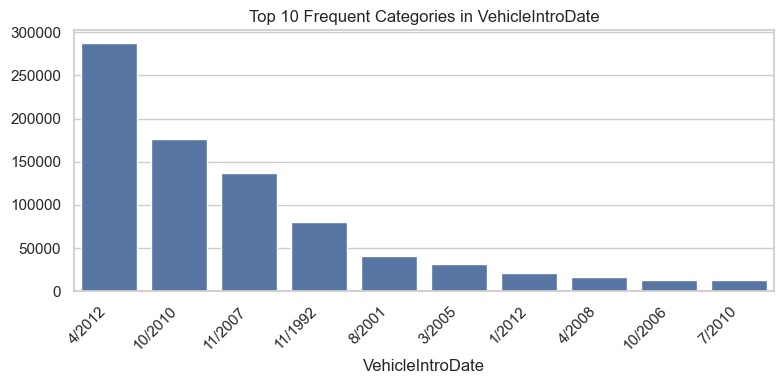

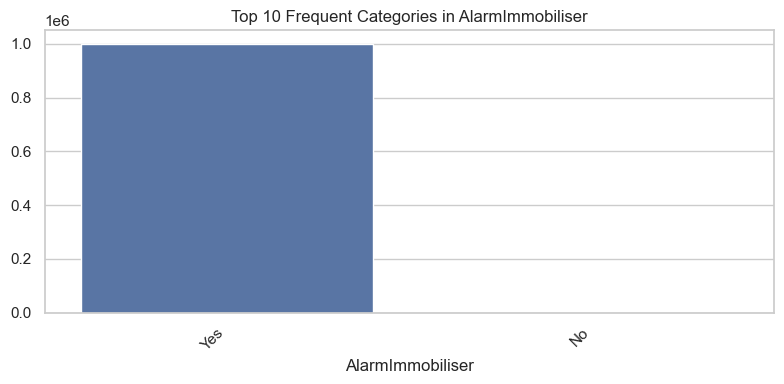

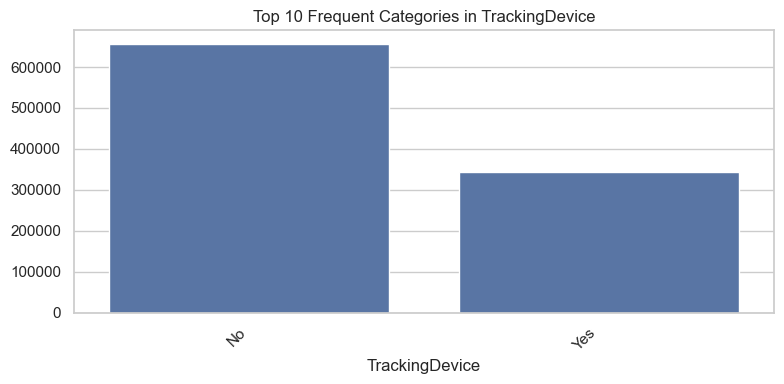

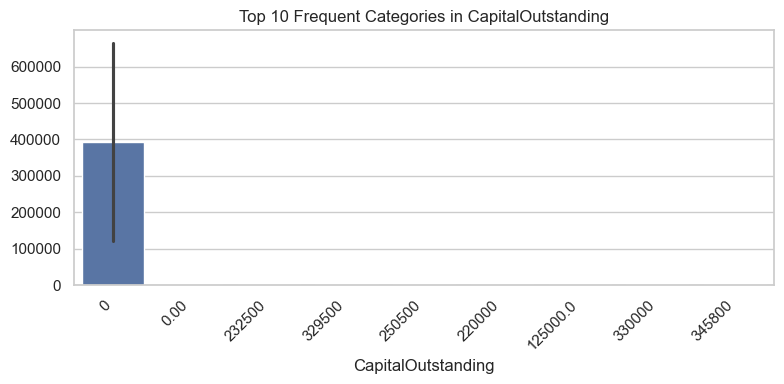

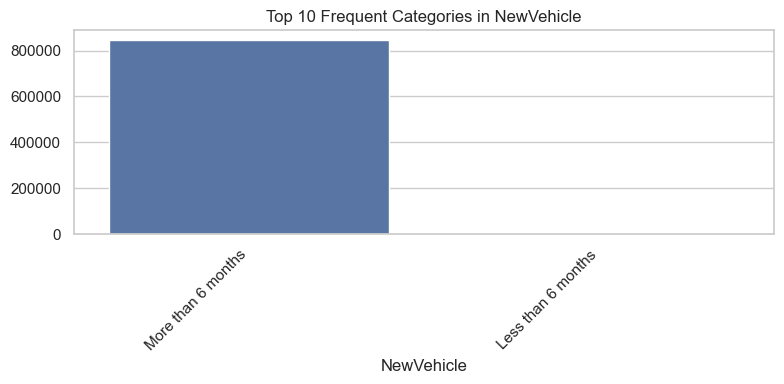

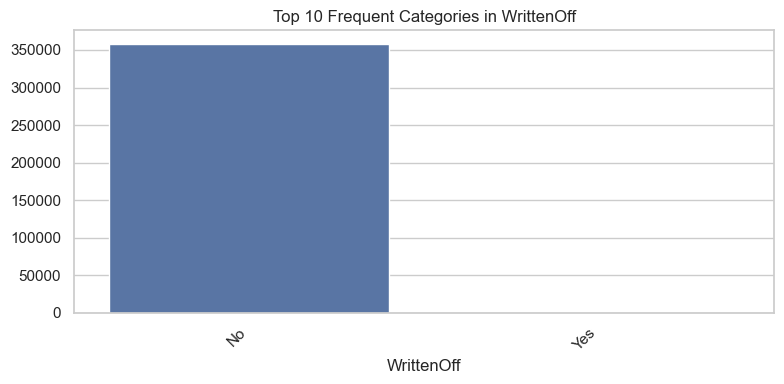

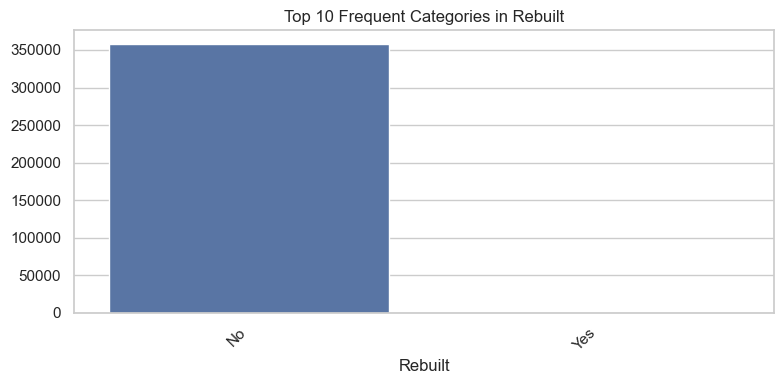

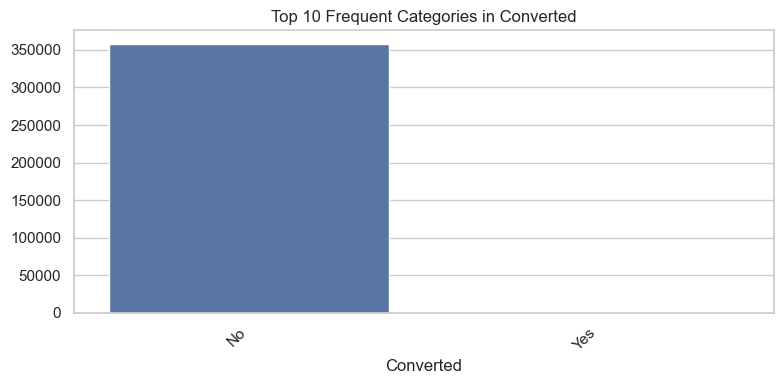

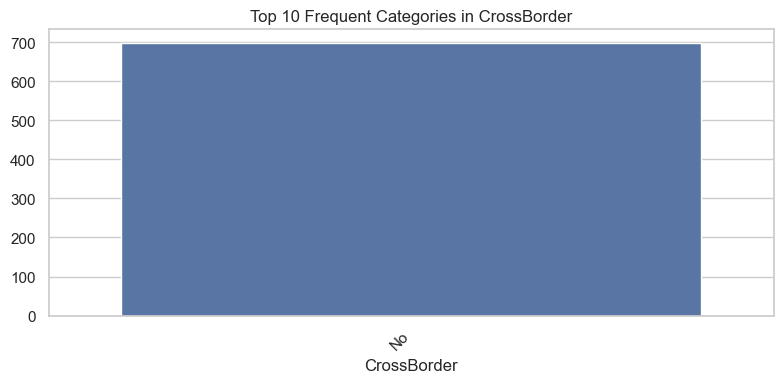

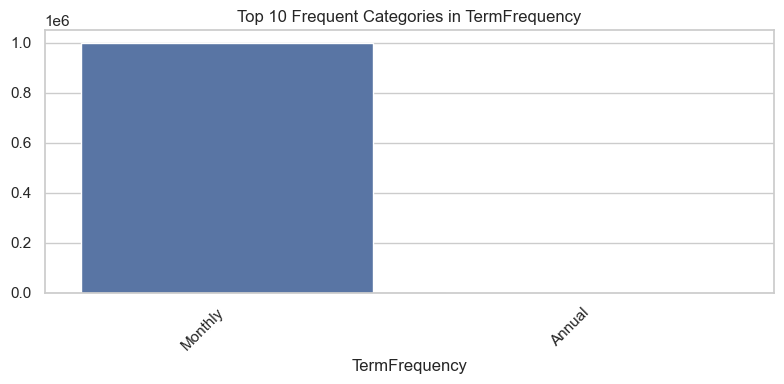

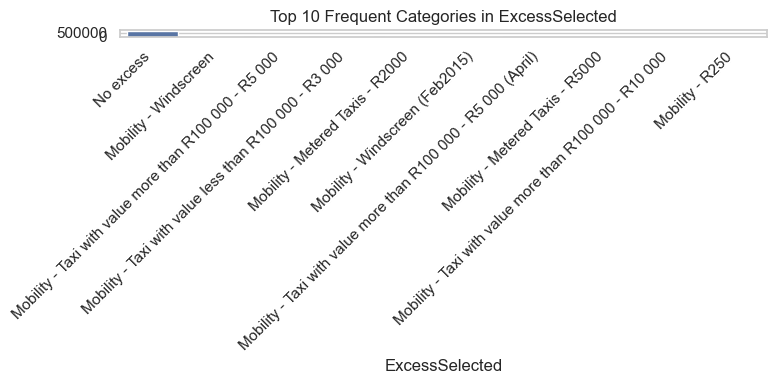

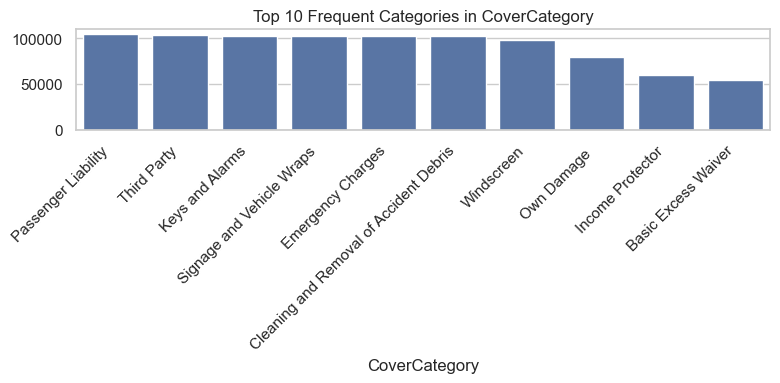

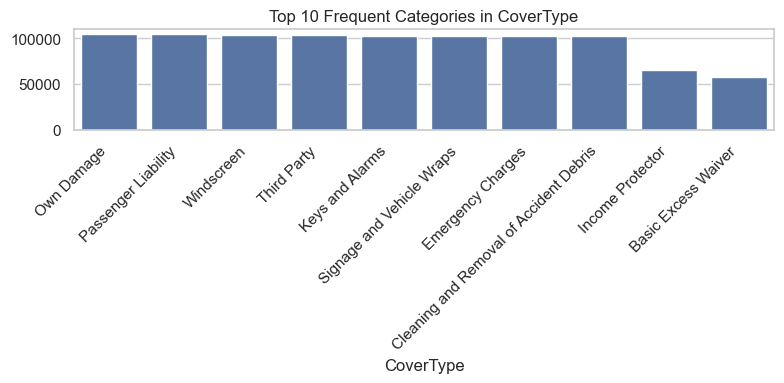

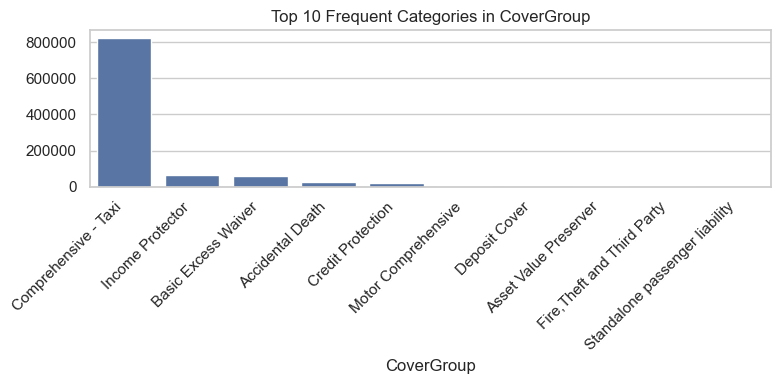

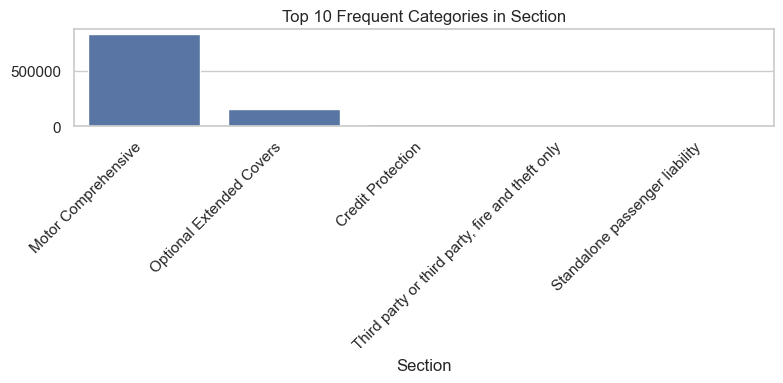

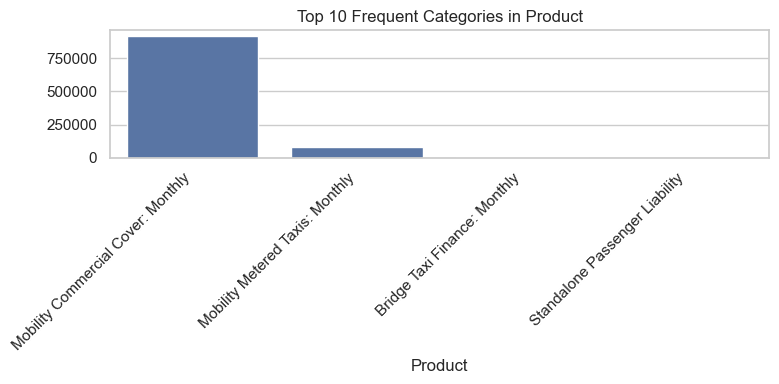

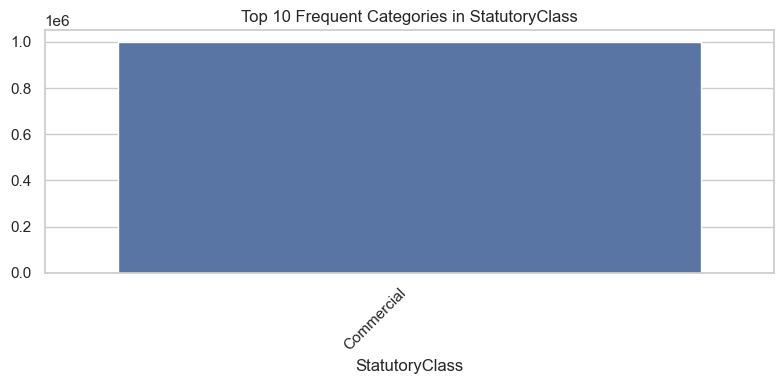

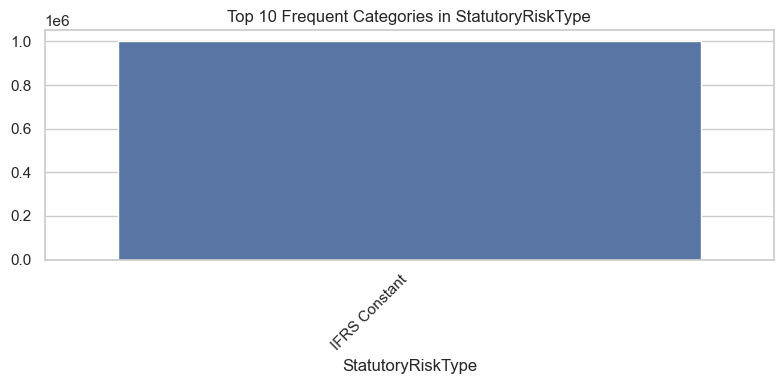

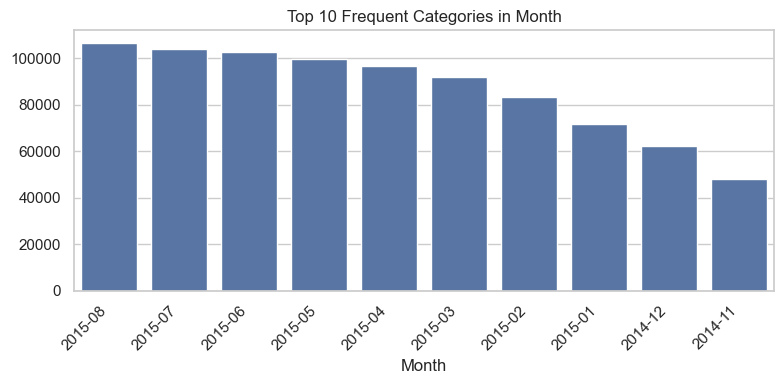


🔁 Bivariate Analysis (Correlations & Scatter):


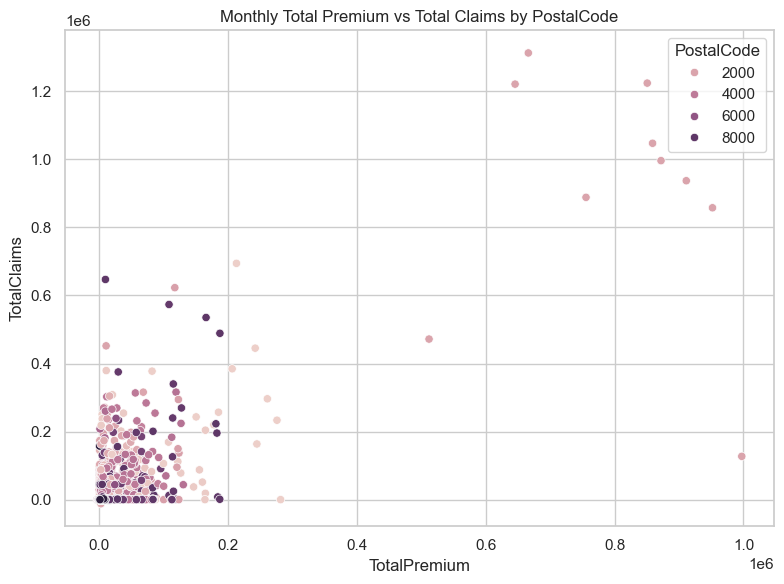

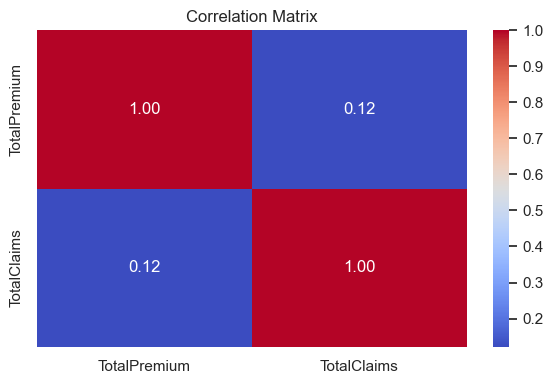


🗺️ Geographic Trends:


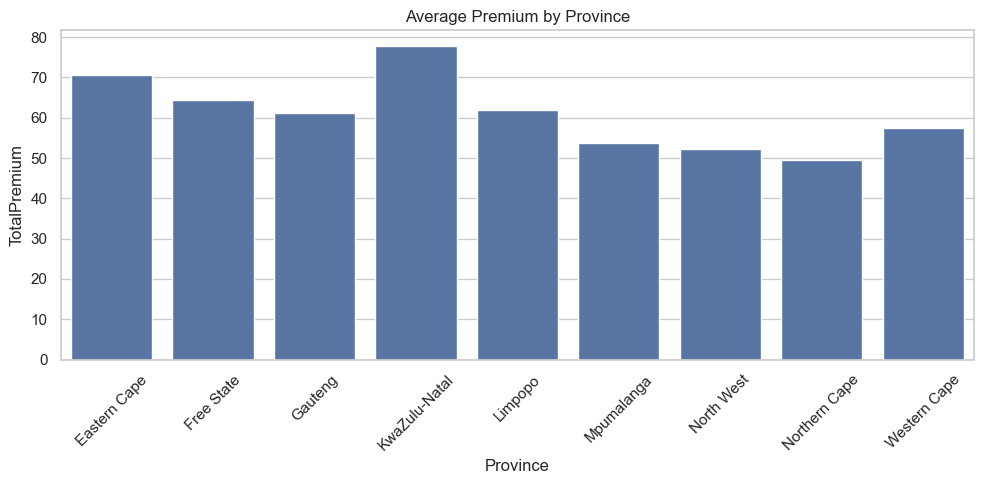

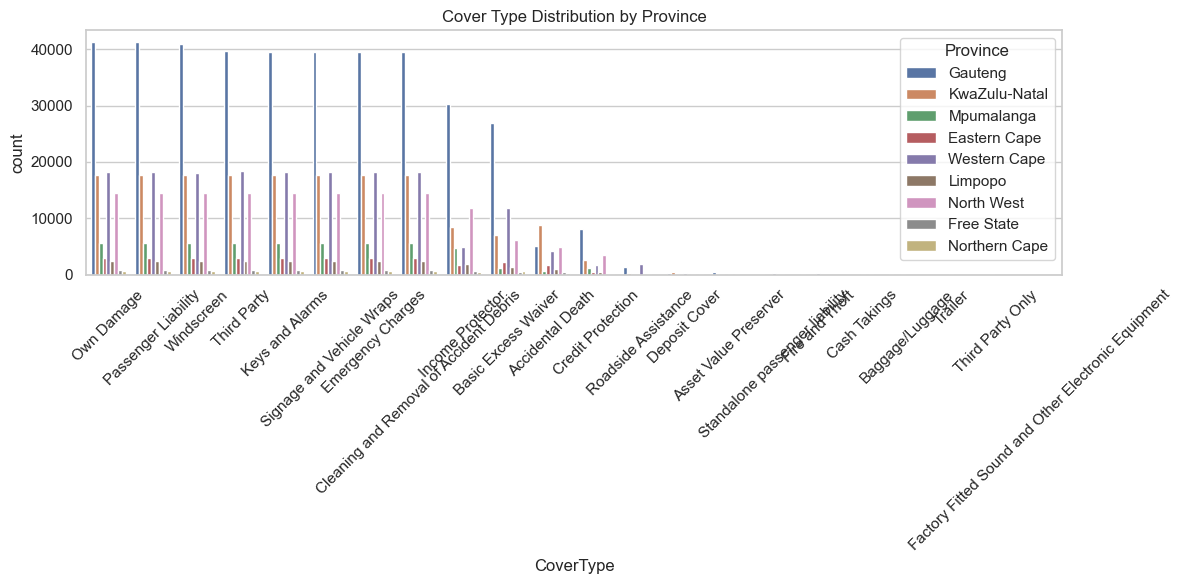

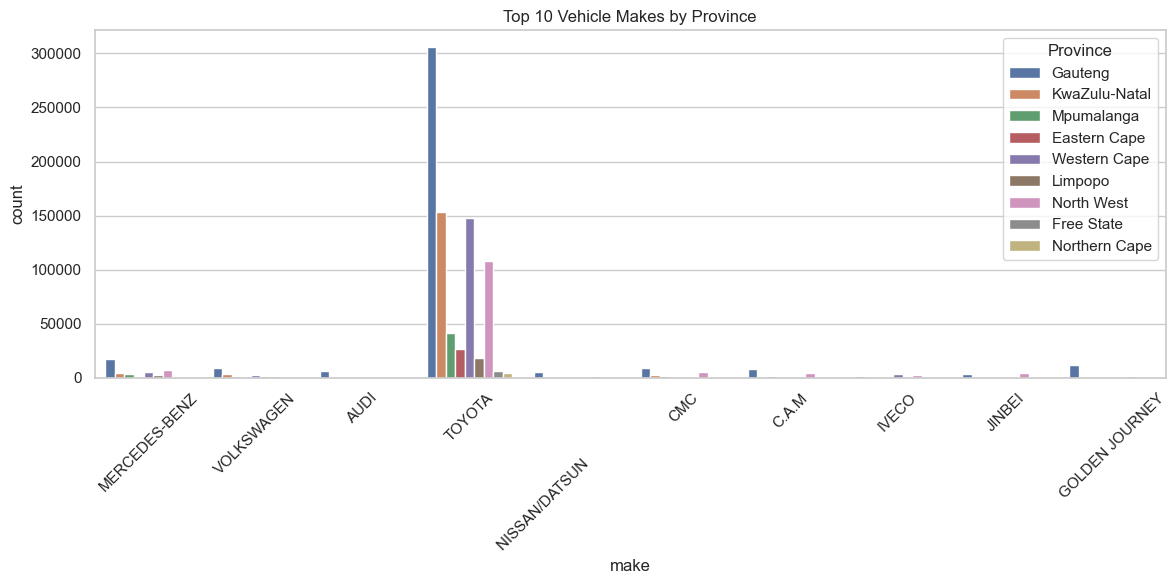


🚨 Outlier Detection:


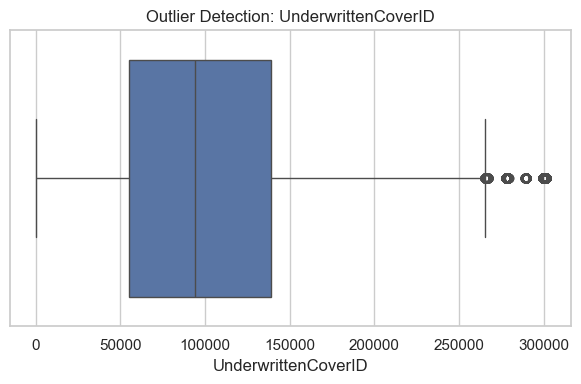

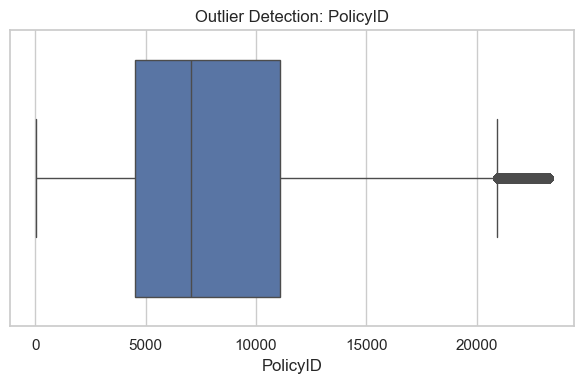

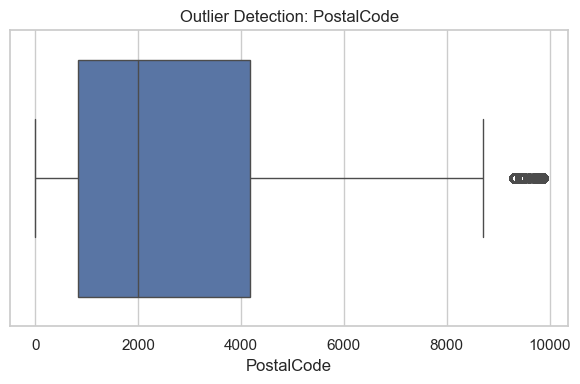

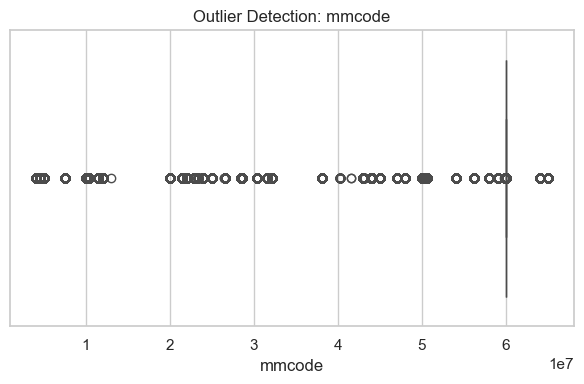

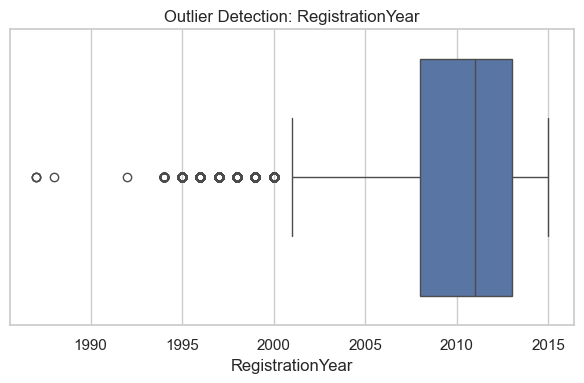

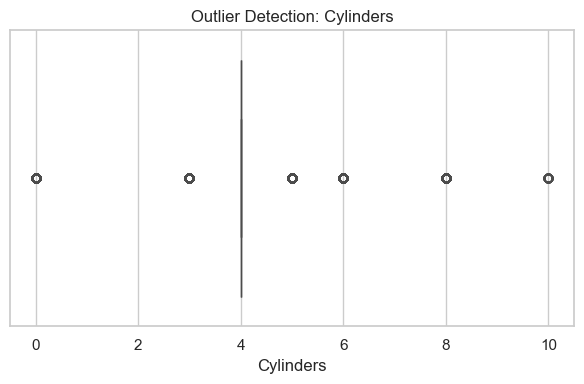

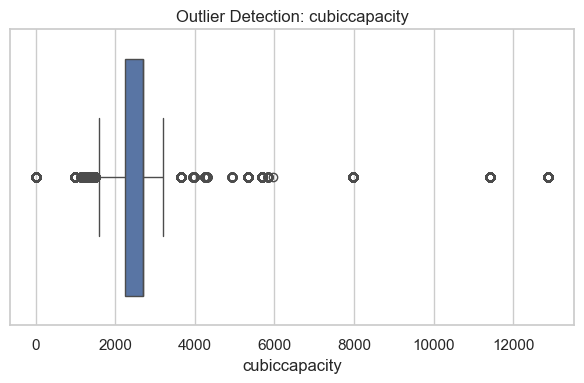

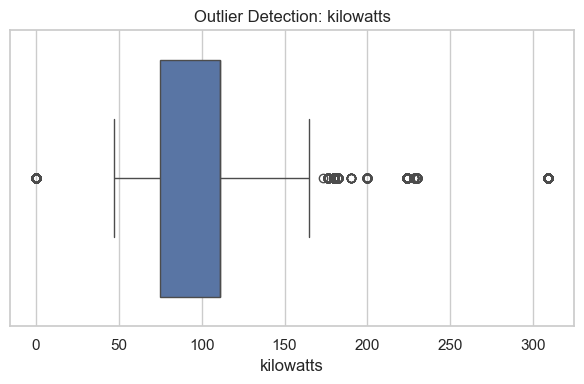

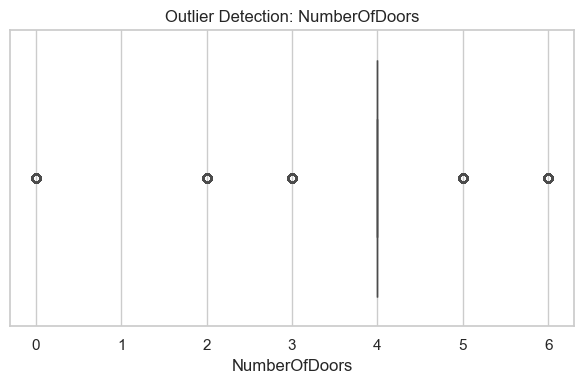

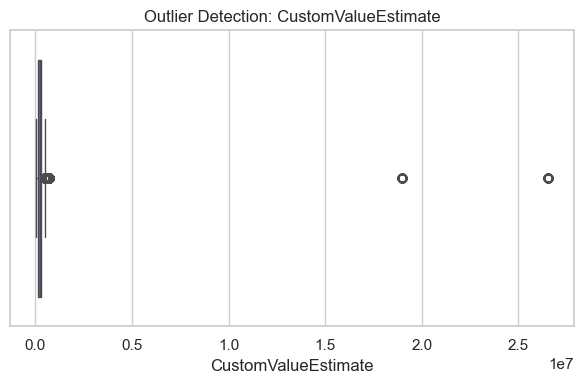

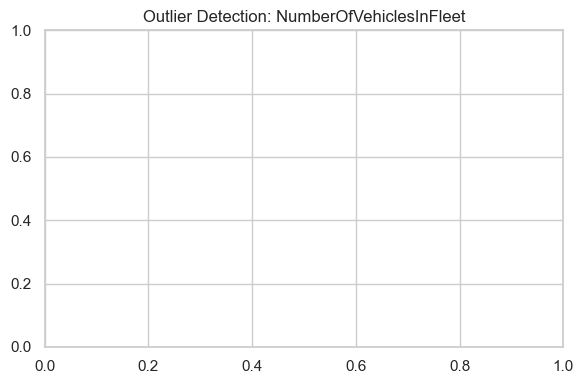

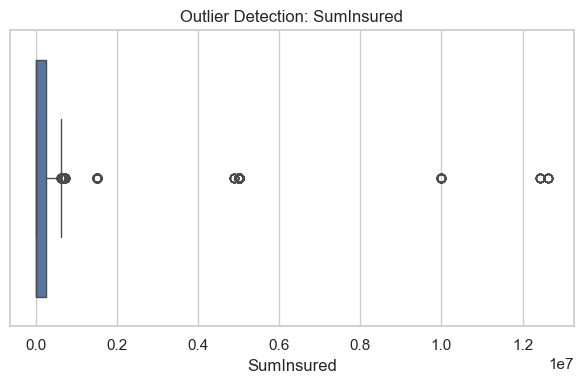

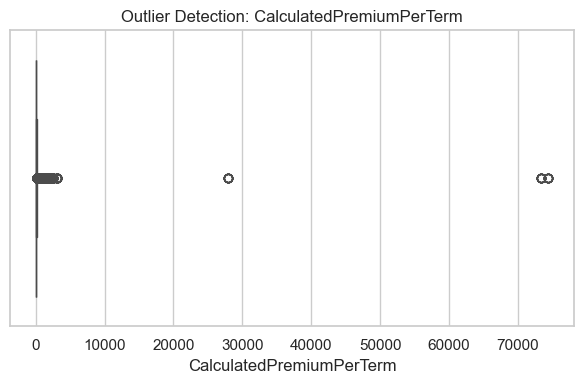

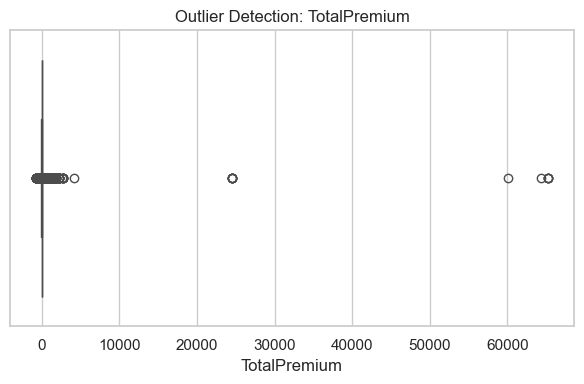

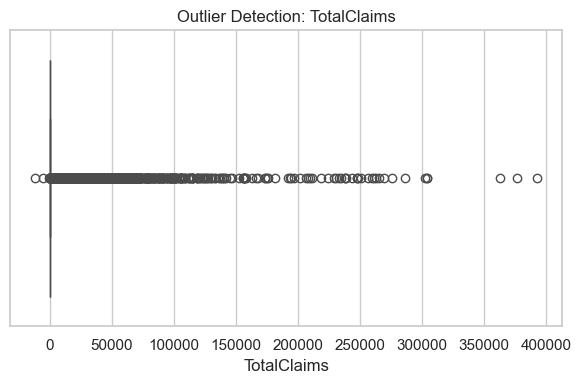

In [13]:
from eda_bivariate_multivariate import (
    run_full_eda
)
run_full_eda(df)

S:\AI MAstery\week-3\acis-week3-analytics\scripts\visualization.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_avg.index, y=province_avg.values, palette='viridis')


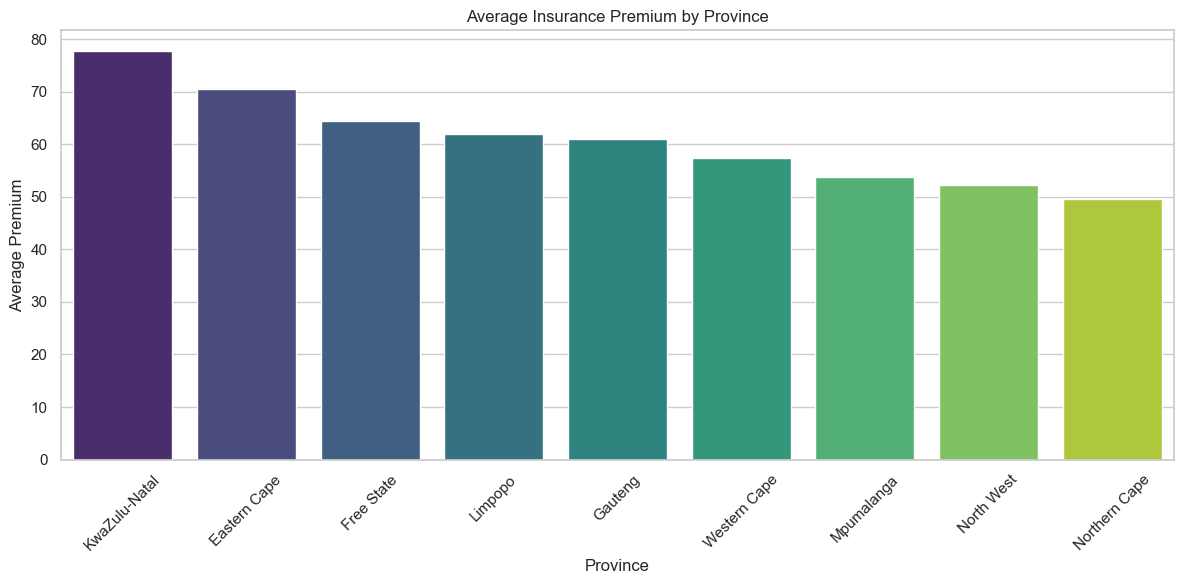

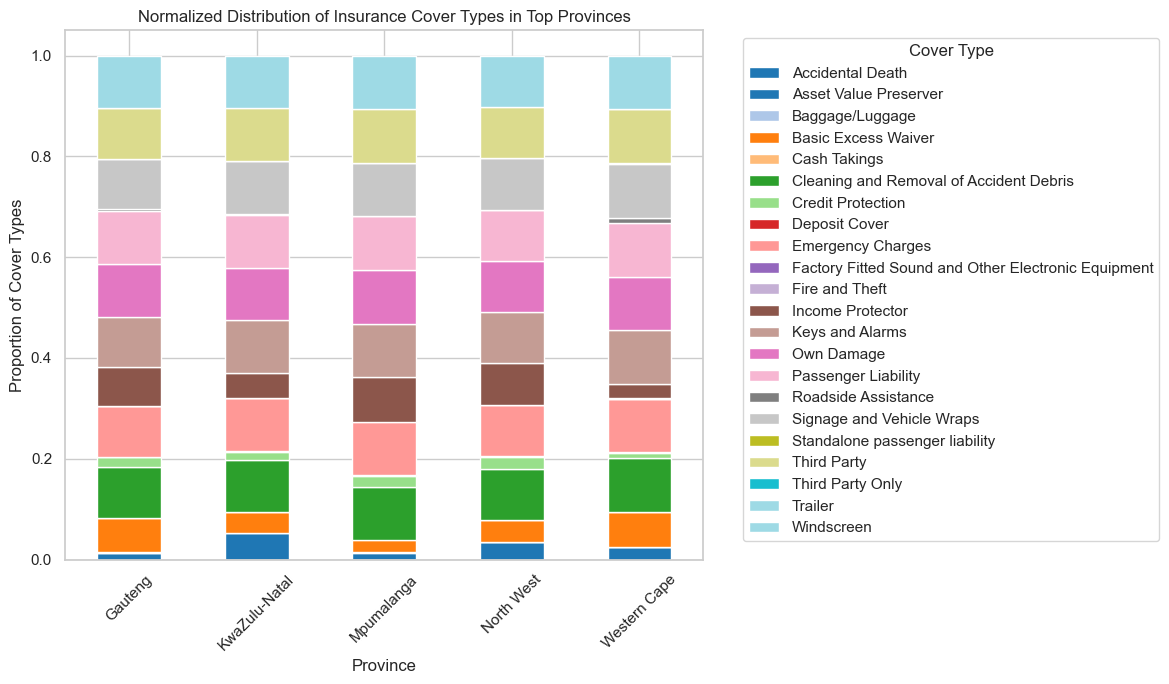

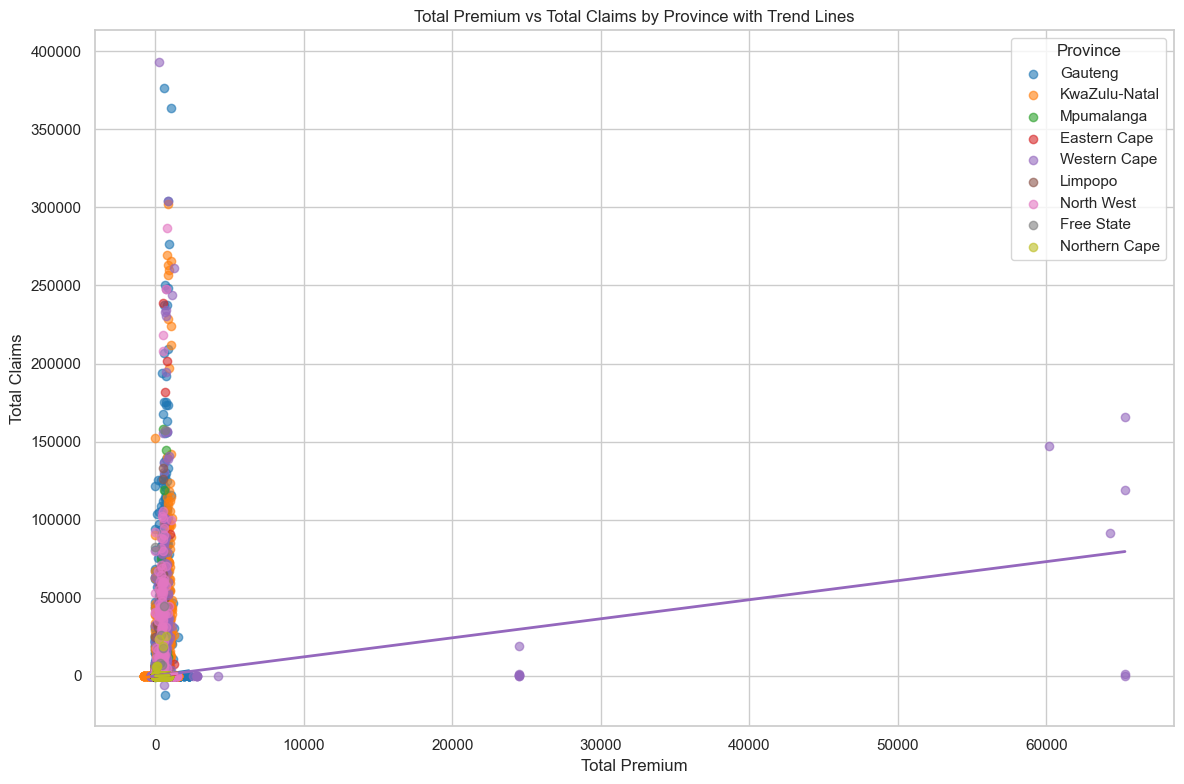

In [14]:
from visualization import plot_avg_premium_by_province, plot_cover_type_distribution, plot_premium_vs_claims_trend

# Assuming your DataFrame is named df
plot_avg_premium_by_province(df)
plot_cover_type_distribution(df)
plot_premium_vs_claims_trend(df)
